In [1]:
import random

In [2]:
# matplotlib notebook
# import matplotlib
# matplotlib.use('TkAgg')

In [3]:
from common import Item
from ortools_models import task_one_model
from skyline import skyline_decode
from plots import draw_pallet

In [4]:
items = [Item(random.randint(1, 5), random.randint(1, 5), random.randint(1, 5)) for _ in range(10)]
items

In [5]:
exRes = task_one_model(10, 10, items, limit=30 * 1000)
exRes

(0,
 32.0,
 32.0,
  <common.Position at 0x67a0700>])

In [6]:
skRes = skyline_decode(10, 10, items, range(len(items)))
skRes

(32,
  <common.Position at 0x840c460>])

D:\yadisk\projects\pallet-packing\plots.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


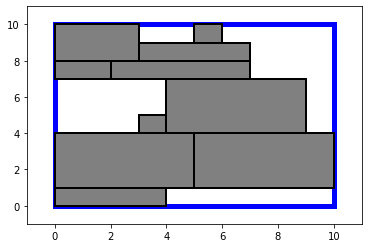

In [7]:
draw_pallet(10, 10, items, exRes[3])

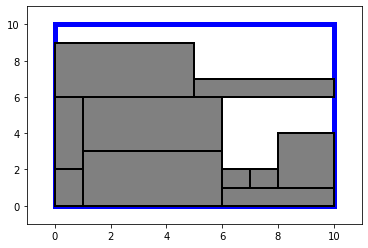

In [8]:
draw_pallet(10, 10, items, skRes[1])